In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import keras

In [2]:
#importing data
data=pd.read_csv(r"E:\\data science\\documents\\Restaurant_Reviews.tsv" , delimiter="\t")

In [3]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
data.shape

(1000, 2)

In [5]:
data.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


# Data cleaning

In [6]:
import re
import string
import nltk
from nltk.stem import WordNetLemmatizer
wn=WordNetLemmatizer()

In [7]:
sw=nltk.corpus.stopwords.words('english')
ps=nltk.PorterStemmer()

In [8]:
imp_word=["not","couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

In [9]:
for word in imp_word:
    sw.remove(word)

In [10]:
corpus=[]
for i in range(0,1000):
    review = data['Review'][i]
    review = re.sub("[^a-zA-Z]", " ",review)
    review = review.lower()
    review = review.split()
    d = []
    for word in review:
        if (word not in sw):
            d.append(wn.lemmatize(word))
    review=" ".join(d)
    corpus.append(review)

In [11]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [12]:
corpus

['wow loved place',
 'crust not good',
 'not tasty texture nasty',
 'stopped late may bank holiday rick steve recommendation loved',
 'selection menu great price',
 'getting angry want damn pho',
 'honeslty didn taste fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fry great',
 'great touch',
 'service prompt',
 'would not go back',
 'cashier care ever say still ended wayyy overpriced',
 'tried cape cod ravoli chicken cranberry mmmm',
 'disgusted pretty sure human hair',
 'shocked sign indicate cash',
 'highly recommended',
 'waitress little slow service',
 'place not worth time let alone vega',
 'not like',
 'burrittos blah',
 'food amazing',
 'service also cute',
 'could care le interior beautiful',
 'performed',
 'right red velvet cake ohhh stuff good',
 'never brought salad asked',
 'hole wall great mexican street taco friendly staff',
 'took hour get food table restaurant food luke warm sever running around like totally overwhelmed',
 'worst salmon sashimi'

# Word cloud

In [13]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wc=WordCloud(background_color="white")

In [14]:
reviews=" ".join(corpus)
img=wc.generate(reviews)
img

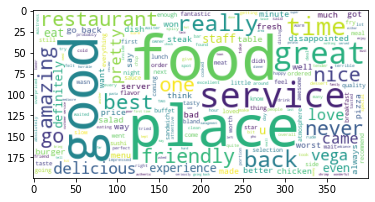

In [15]:
plt.imshow(img)

# vectorization

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer as tv
vector=tv(max_features=1600)
x_tfidf=vector.fit_transform(corpus).toarray()


In [17]:
print(vector.get_feature_names())

['absolutely', 'absolutley', 'accident', 'accommodation', 'accomodate', 'accordingly', 'accountant', 'ache', 'acknowledged', 'across', 'actual', 'actually', 'added', 'affordable', 'afternoon', 'ago', 'ahead', 'airline', 'airport', 'ala', 'albondigas', 'allergy', 'almond', 'almost', 'alone', 'also', 'although', 'always', 'amazing', 'ambiance', 'ambience', 'amount', 'ample', 'andddd', 'angry', 'annoying', 'another', 'anticipated', 'anymore', 'anyone', 'anything', 'anytime', 'anyway', 'anyways', 'apart', 'apologize', 'apology', 'app', 'appalling', 'apparently', 'appealing', 'appetite', 'appetizer', 'apple', 'approval', 'area', 'arepas', 'aria', 'around', 'array', 'arrived', 'arrives', 'arriving', 'article', 'ask', 'asked', 'asking', 'assure', 'ate', 'atmosphere', 'atrocious', 'attached', 'attack', 'attention', 'attentive', 'attitude', 'auju', 'authentic', 'average', 'avocado', 'avoid', 'avoided', 'away', 'awesome', 'awful', 'awkward', 'awkwardly', 'ayce', 'az', 'baba', 'baby', 'bachi', 'b

In [18]:
x_data=pd.DataFrame(x_tfidf,columns=vector.get_feature_names())

In [19]:
X_data=np.array(x_data)

# model building

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_data,y,test_size=15,stratify=y)

# building neural network

In [27]:
from keras import Sequential
from keras.layers import Dense

In [28]:
model=Sequential()

In [29]:
model.add(Dense(input_dim=x_train.shape[1],kernel_initializer="random_uniform",activation='relu',units=1565))
model.add(Dense(kernel_initializer="random_uniform",activation='relu',units=1565))
model.add(Dense(kernel_initializer="random_uniform",activation='relu',units=1565))

model.add(Dense(kernel_initializer="random_uniform",activation='sigmoid',units=1))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1565)              2505565   
_________________________________________________________________
dense_1 (Dense)              (None, 1565)              2450790   
_________________________________________________________________
dense_2 (Dense)              (None, 1565)              2450790   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1566      
Total params: 7,408,711
Trainable params: 7,408,711
Non-trainable params: 0
_________________________________________________________________


In [31]:
train=model.fit(x_train,y_train,epochs=25,batch_size=25) #building model

Epoch 1/25
40/40 [==============================] - 3s 82ms/step - loss: 0.5961 - accuracy: 0.6629 0s - loss: 0.5980 - accuracy: 0.
Epoch 2/25
40/40 [==============================] - 3s 81ms/step - loss: 0.1093 - accuracy: 0.9766
Epoch 3/25
40/40 [==============================] - 3s 82ms/step - loss: 0.0334 - accuracy: 0.9878
Epoch 4/25
40/40 [==============================] - 3s 79ms/step - loss: 0.0105 - accuracy: 0.9959
Epoch 5/25
40/40 [==============================] - 3s 75ms/step - loss: 0.0037 - accuracy: 0.9980
Epoch 6/25
40/40 [==============================] - 3s 79ms/step - loss: 0.0079 - accuracy: 0.9980
Epoch 7/25
40/40 [==============================] - 3s 86ms/step - loss: 0.0037 - accuracy: 0.9980
Epoch 8/25
40/40 [==============================] - 3s 86ms/step - loss: 0.0037 - accuracy: 0.9980
Epoch 9/25
40/40 [==============================] - 3s 67ms/step - loss: 0.0034 - accuracy: 0.9990
Epoch 10/25
40/40 [==============================] - 3s 77ms/step - loss: 0.

In [32]:
y_pred=model.predict_classes(x_test)  #predicting model


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_pred,y_test)

0.9333333333333333

# prediction with example

In [69]:
my_review="resturant food  is always good"
my_review=np.array([my_review])
my_review=vector.transform(my_review).toarray()

In [70]:
my_review

array([[0., 0., 0., ..., 0., 0., 0.]])

In [71]:
my_review.shape

(1, 1600)

In [72]:
model.predict_classes(my_review)

array([[1]])

# save the model

In [73]:
model.save("resturant_reviews.h5")